<a href="https://colab.research.google.com/github/faezesarlakifar/LinearRegression/blob/main/LinearRegression_and_PRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Necessaries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math 

# Preprocess Data

## Plot Train Data


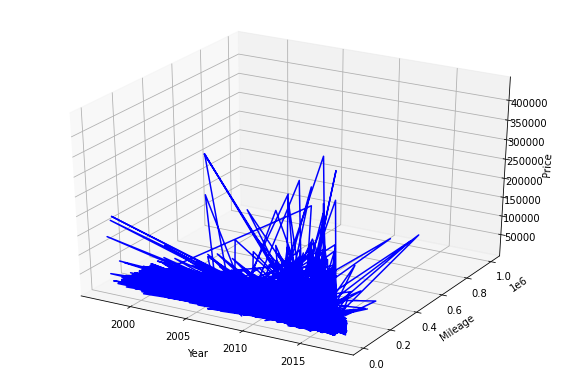

In [ ]:
data = pd.read_csv('train.csv')

fig_0=plt.figure(figsize=(10,15))

ax =fig_0.add_subplot(211,projection='3d')

X = data.iloc[:, 1]
Y = data.iloc[:, 2]
Z = data.iloc[:, 0]

ax.set_xlabel('Year')
ax.set_ylabel('Mileage')
ax.set_zlabel('Price')

ax.plot3D(X, Y, Z, 'Blue')



plt.show()

### Train data head

In [ ]:
df = data
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,29495,2013,73121,Oklahoma City,OK,1GNSKBE01DR127341,Chevrolet,TahoeLT
1,35969,2016,31800,Conyers,GA,1C4BJWDGXGL119960,Jeep,Wrangler
2,21477,2016,40655,Elk Grove Village,IL,2G1145S39G9149688,Chevrolet,ImpalaLTZ
3,13889,2015,41646,Marysville,WA,1G1PE5SB5F7250712,Chevrolet,Cruze2LT
4,14225,2016,33535,Toledo,OH,1N4AL3AP2GC197633,Nissan,Altima2.5


### Test data head

In [ ]:
df_test = pd.read_csv('test.csv')
df_test.head() 

,Year,Mileage,City,State,Vin,Make,Model,CarId
0,2013,72740,Skokie,IL,1FMCU0F77DUB44225,Ford,EscapeS,0
1,2017,5355,Miami Gardens,FL,1FADP3K27HL246539,Ford,FocusSE,1
2,2016,41454,Raleigh,NC,4T1BF1FK4GU163478,Toyota,CamrySE,2
3,2017,19870,Albany,GA,1GNSCBKC0HR161613,Chevrolet,TahoeLT,3
4,2016,22576,Chesapeake,VA,1G1PG5SB2G7122567,Chevrolet,Cruze,4


## Check if Year Feature Needs Binning or Not

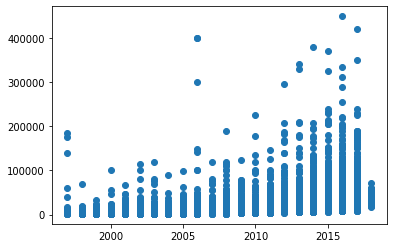

In [ ]:
X = df.iloc[:, 1]
Y = df.iloc[:, 0]

plt.scatter(X, Y)
plt.show() 

as we see, when year increase, price increase to. and they have good corelation to each other. so it doesnt need to do binning to categorize the years and then one hot encode it to remove the relation of bigger or smaller year.

## Remove Unimportant features

### for train data

In [ ]:
df = df.drop(['City', 'Vin', 'Make'], axis=1)
df.head()

,Price,Year,Mileage,State,Model
0,29495,2013,73121,OK,TahoeLT
1,35969,2016,31800,GA,Wrangler
2,21477,2016,40655,IL,ImpalaLTZ
3,13889,2015,41646,WA,Cruze2LT
4,14225,2016,33535,OH,Altima2.5


### for test data

In [ ]:
df_test = df_test.drop(['City', 'Vin', 'Make'], axis=1)
df_test.head() 

,Year,Mileage,State,Model,CarId
0,2013,72740,IL,EscapeS,0
1,2017,5355,FL,FocusSE,1
2,2016,41454,NC,CamrySE,2
3,2017,19870,GA,TahoeLT,3
4,2016,22576,VA,Cruze,4


## check and remove outliers of year feature

#### check and remove outliers of mileage feature

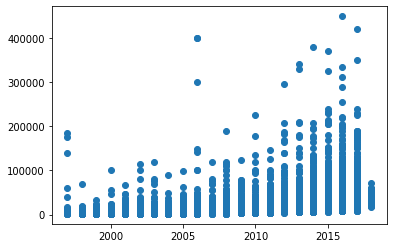

In [ ]:
X = df.iloc[:, 1]
Y = df.iloc[:, 0]

plt.scatter(X, Y)
plt.show() 

##### remove outliers and plot
- find the high and low bound of price of each year by a formula and set it 2.5 times upper or lower.
- then remove all examples which are out of this limits for each year
- retry above items to achieve better results
- then plot it to show how we are better now

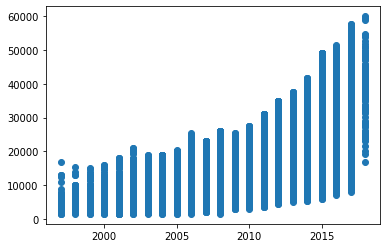

In [ ]:
for i in range(2):
  df_Years = df.groupby('Year')['Price']
  high = df_Years.mean() + df_Years.std() * 2.5
  low = df_Years.mean() - df_Years.std() * 2.5

  for year in df['Year'].unique():
      df = df.drop(df[(df['Price'] > high[year]) & (df['Year'] == year)].index)
      df = df.drop(df[(df['Price'] < low[year]) & (df['Year'] == year)].index)


X = df.iloc[:, 1]
Y = df.iloc[:, 0]

plt.scatter(X, Y)
plt.show() 

#### check and remove outliers of mileage feature

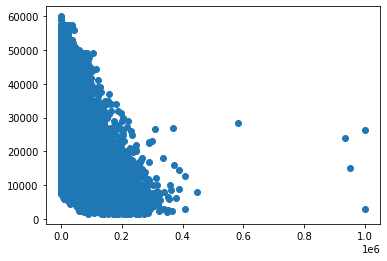

In [ ]:
X = df.iloc[:, 2]
Y = df.iloc[:, 0]

plt.scatter(X, Y)
plt.show() 

##### remove outliers and plot
- this is so simple. just remove mileages higher than 0.4(10^6) in plot.

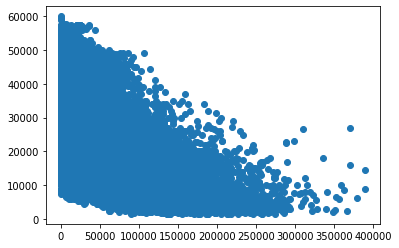

In [ ]:
df = df[df['Mileage'] < 400000]

X = df.iloc[:, 2]
Y = df.iloc[:, 0]

plt.scatter(X, Y)
plt.show() 

now we see mileages has outlier again. if we change the condition to 300000 uppper bound, we get better results. 

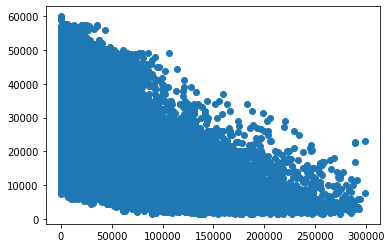

In [ ]:
df = df[df['Mileage'] < 300000]

X = df.iloc[:, 2]
Y = df.iloc[:, 0]

plt.scatter(X, Y)
plt.show()

## Add categorical features and enocode them
- state
- model
- use one hot encoding for this features

### for train data

In [ ]:
one_hot_Model = pd.get_dummies(df.Model, prefix='Model')
one_hot_State = pd.get_dummies(df.State, prefix='State')

# Drop column Model as it is now encoded
df = df.drop('Model',axis = 1)
# Join the encoded df
df = df.join(one_hot_Model)     #because of RAM limitation, we didnt add this one hot feature.

# Do above tries for State feature
df = df.drop('State',axis = 1)
df = df.join(one_hot_State)

df.head() 

,Price,Year,Mileage,Model_1,Model_124,Model_15002WD,Model_15004WD,Model_1500Big,Model_1500Express,"Model_1500Express,",...,State_ TX,State_ UT,State_ VA,State_ VT,State_ Va,State_ WA,State_ WI,State_ WV,State_ WY,State_ ga
0,29495,2013,73121,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,35969,2016,31800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,21477,2016,40655,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13889,2015,41646,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,14225,2016,33535,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### for test data

In [ ]:
one_hot_Model = pd.get_dummies(df_test.Model, prefix='Model')
one_hot_State = pd.get_dummies(df_test.State, prefix='State')

# Drop column Model as it is now encoded
df_test = df_test.drop('Model',axis = 1)
# Join the encoded df
df_test = df_test.join(one_hot_Model)     #because of RAM limitation, we didnt add this one hot feature.

# Do above tries for State feature
df_test = df_test.drop('State',axis = 1)
df_test = df_test.join(one_hot_State)

df_test.head() 

,Year,Mileage,CarId,Model_1,Model_124,Model_15002WD,Model_15004WD,Model_1500Big,Model_1500Express,"Model_1500Express,",...,State_ TX,State_ UT,State_ VA,State_ VT,State_ Va,State_ WA,State_ WI,State_ WV,State_ WY,State_ ga
0,2013,72740,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,5355,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016,41454,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,19870,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016,22576,4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Normalization 
- mileage and year feature need normalization

### for train data

In [ ]:
max_value = df['Mileage'].max()
min_value = df['Mileage'].min()
df['Mileage'] = (df['Mileage'] - min_value) / (max_value - min_value)

max_value = df['Year'].max()
min_value = df['Year'].min()
df['Year'] = (df['Year'] - min_value) / (max_value - min_value)

df.head()

,Price,Year,Mileage,Model_1,Model_124,Model_15002WD,Model_15004WD,Model_1500Big,Model_1500Express,"Model_1500Express,",...,State_ TX,State_ UT,State_ VA,State_ VT,State_ Va,State_ WA,State_ WI,State_ WV,State_ WY,State_ ga
0,29495,0.761905,0.244390,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,35969,0.904762,0.106275,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,21477,0.904762,0.135872,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13889,0.857143,0.139185,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,14225,0.904762,0.112074,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### for test data

In [ ]:
max_value = df_test['Mileage'].max()
min_value = df_test['Mileage'].min()
df_test['Mileage'] = (df_test['Mileage'] - min_value) / (max_value - min_value)

max_value = df_test['Year'].max()
min_value = df_test['Year'].min()
df_test['Year'] = (df_test['Year'] - min_value) / (max_value - min_value)

df_test.head()

,Year,Mileage,CarId,Model_1,Model_124,Model_15002WD,Model_15004WD,Model_1500Big,Model_1500Express,"Model_1500Express,",...,State_ TX,State_ UT,State_ VA,State_ VT,State_ Va,State_ WA,State_ WI,State_ WV,State_ WY,State_ ga
0,0.761905,0.072735,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.952381,0.005350,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.904762,0.041449,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.952381,0.019865,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.904762,0.022571,4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# Build and Train Model

## Hyper parameters

In [ ]:
lr = 0.1
epoch = 4000
stopping_threshold = 1e-6

## Loss function
- Squared error

In [ ]:
# t is our target, X is input, W is Weight and b is bias
def loss_function(X, t, W, b):
      #pred = X.dot(W) + b
      pred = np.dot(X, W) 
      return np.square(pred - t) 

## Cost function
- MSE
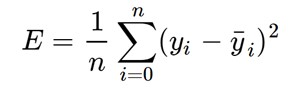

In [ ]:
# t is our target, X is input, W is Weight and b is bias
def cost_function(X, t, W, b):
    return np.sum(loss_function(X, t, W, b)) / len(t)

## Gradient Descent
repeat until convergence

```
{
    w = w - (learning_rate * (dJ/dw))
    b = b - (learning_rate * (dJ/db))
}

```

 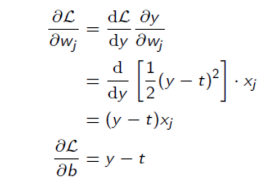

In [ ]:
# lr is learning rate (alpha), iter is the number of iterations.

# we defined Batch Gradient Descent in which all examples used in each iteration. so in this case, iterations and epochs are the same.
# if we used mini-batch gradient descent, we had some iterations per epoch.
def BGD(X, t, lr=lr, iter=epoch, stopping_threshold=stopping_threshold):

    # initialize W and b by zero.
    # we can initialize W better than initialize by zero. but this is easy for now.
    b = 0 
    W = np.zeros((X.shape[1],))

    # we need cost value of each iteration to know the cost changes is descending or not.
    cost_per_iter = []
    previous_cost = None

    n = float(len(t))

    for i in range(iter):

        pred = np.dot(X, W.T) + b 

        # calculate derivations and update weights and bias
        W = W - (lr * X.T.dot(pred - t) / n)
        b = b -  (lr * np.sum(pred - t) / n)

        # save current cost
        current_cost = cost_function(X, t, W, b)
        cost_per_iter.append(current_cost)

        # use early stopping to prevent from over-fitting
        if previous_cost and abs(previous_cost - current_cost) <= stopping_threshold:
            break
        
        previous_cost = current_cost

        print(f'epoch {i+1}: cost is {current_cost} now')

    return cost_per_iter, W, b

## Train

### set inputs and label for training

In [ ]:
X_train, y_train = df.drop(['Price'], axis=1), df['Price']

X = np.array(X_train)
t = np.array(y_train)

print(X.shape)
print(t.shape)

(96209, 1995)
(96209,)


In [ ]:
X_train.head()

,Year,Mileage,Model_1,Model_124,Model_15002WD,Model_15004WD,Model_1500Big,Model_1500Express,"Model_1500Express,","Model_1500HFE,",...,State_ TX,State_ UT,State_ VA,State_ VT,State_ Va,State_ WA,State_ WI,State_ WV,State_ WY,State_ ga
0,0.761905,0.244390,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.904762,0.106275,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.904762,0.135872,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.857143,0.139185,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.904762,0.112074,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train.head() 

0    29495
1    35969
2    21477
3    13889
4    14225
Name: Price, dtype: int64

###### remove columns of test which there are not in train and add additional columns of train to test dataset.

In [ ]:
for column in df_test.columns:
        if column not in df.columns:
            df_test = df_test.drop([column], axis=1)

for column in df.columns:
        if column not in df_test.columns:
            df_test[column] = 0

df_test = df_test.reindex(df.columns, axis=1) 

### Training and get best w & b

In [ ]:
costs, w, b = BGD(X, t)

epoch 1: cost is 438183256.60192984 now
epoch 2: cost is 393313743.41971296 now
epoch 3: cost is 358109795.64340067 now
epoch 4: cost is 330265121.39270246 now
epoch 5: cost is 308070574.85981566 now
epoch 6: cost is 290249184.700188 now
epoch 7: cost is 275838879.5969978 now
epoch 8: cost is 264108713.48912933 now
epoch 9: cost is 254498693.65669087 now
epoch 10: cost is 246576299.4872472 now
epoch 11: cost is 240004853.3673869 now
epoch 12: cost is 234520347.74807048 now
epoch 13: cost is 229914337.62230965 now
epoch 14: cost is 226021209.35839033 now
epoch 15: cost is 222708627.74558976 now
epoch 16: cost is 219870307.42726806 now
epoch 17: cost is 217420497.108919 now
epoch 18: cost is 215289735.8974161 now
epoch 19: cost is 213421562.2815148 now
epoch 20: cost is 211769942.5008771 now
epoch 21: cost is 210297246.74418688 now
epoch 22: cost is 208972646.00061232 now
epoch 23: cost is 207770834.51854423 now
epoch 24: cost is 206671006.2426313 now
epoch 25: cost is 205656030.7921719 

### Plot cost function

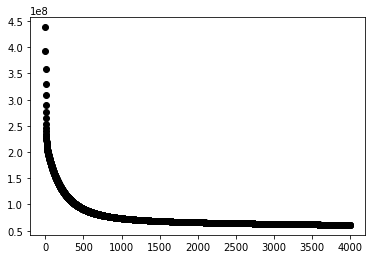

In [ ]:
X = range(len(costs))
Y = costs

plt.scatter(X, Y, color='black')
plt.show() 

it has descending behavior so its OK. :)

# Prediction

## Use Linear Regression and predict the best line for mileage feature

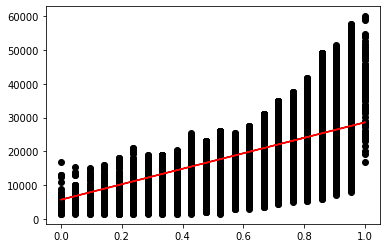

In [ ]:
X = df['Year']
Y = df['Price']
plt.scatter(X, Y, color='black')

X_line = X
Y_line = df['Year'] * w[0] + b

plt.plot(X_line, Y_line, color='red')

## Predict Test data tagets and prepare the result in csv format

In [ ]:
#df_test = df_test.drop(['CarId'], axis=1)

df_test.shape

(50000, 1995)

###### we should add columns of train which they are not in test
- they should have the same dimonsion

In [ ]:
print(df.columns)

Index(['Price', 'Year', 'Mileage', 'Model_1', 'Model_124', 'Model_15002WD',
       'Model_15004WD', 'Model_1500Big', 'Model_1500Express',
       'Model_1500Express,',
       ...
       'State_ TX', 'State_ UT', 'State_ VA', 'State_ VT', 'State_ Va',
       'State_ WA', 'State_ WI', 'State_ WV', 'State_ WY', 'State_ ga'],
      dtype='object', length=1996)


In [ ]:
print(df_test.columns)

Index(['Year', 'Mileage', 'Model_1', 'Model_124', 'Model_15002WD',
       'Model_15004WD', 'Model_1500Big', 'Model_1500Express',
       'Model_1500Express,', 'Model_1500HFE,',
       ...
       'State_ TX', 'State_ UT', 'State_ VA', 'State_ VT', 'State_ Va',
       'State_ WA', 'State_ WI', 'State_ WV', 'State_ WY', 'State_ ga'],
      dtype='object', length=1995)


In [ ]:
#df_test = df_test.drop(['Price'], axis=1)
df_test.shape

(50000, 1995)

In [ ]:
df_test.head()

,Year,Mileage,Model_1,Model_124,Model_15002WD,Model_15004WD,Model_1500Big,Model_1500Express,"Model_1500Express,","Model_1500HFE,",...,State_ TX,State_ UT,State_ VA,State_ VT,State_ Va,State_ WA,State_ WI,State_ WV,State_ WY,State_ ga
0,0.761905,0.072735,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.952381,0.005350,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.904762,0.041449,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.952381,0.019865,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.904762,0.022571,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
target = np.array(df_test).dot(w) + b 

df_test_ = pd.read_csv('test.csv')


final_result = pd.DataFrame()

final_result['CarId'] = df_test_['CarId'] 
final_result['Price'] = target

final_result.to_csv('out_new.csv', index=False)

final_result.head()

,CarId,Price
0,0,20943.444175
1,1,25697.865707
2,2,19822.290268
3,3,34670.021832
4,4,19916.487593


In [ ]:
df.shape

(96209, 1996)

# Polynomial

## Preprocess data
- do something such as last work

### Read Data

In [ ]:
df_p = pd.read_csv('data.csv')
df_p.head() 

,Price,Year,Mileage,City,State,Vin,Make,Model
0,40000,2017,2169,Murray,UT,3GCUKREC6HG127376,Chevrolet,Silverado
1,46991,2015,45079,Timonium,MD,1GC1KWEG9FF507573,Chevrolet,Silverado
2,38995,2017,10661,Oklahoma City,OK,3GCUKREC5HG354901,Chevrolet,Silverado
3,31860,2016,29058,Front Royal,VA,1GCVKREC3GZ189479,Chevrolet,Silverado
4,14700,2010,21824,Arlington,TX,1GCPCPEA6AZ241798,Chevrolet,Silverado


### Remove all categorical features

In [ ]:
df_p = df_p.drop(['City', 'Vin', 'Make', 'State', 'Model'], axis=1)
df_p.head() 

,Price,Year,Mileage
0,40000,2017,2169
1,46991,2015,45079
2,38995,2017,10661
3,31860,2016,29058
4,14700,2010,21824


### check and remove outliers

#### check and remove outliers of year feature 

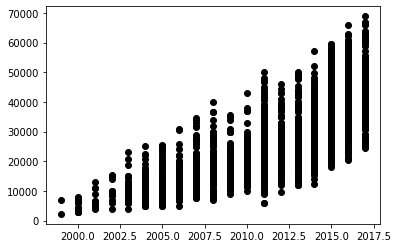

In [ ]:
X = df_p.iloc[:, 1]
Y = df_p.iloc[:, 0]

plt.scatter(X, Y, color='black')
plt.show() 

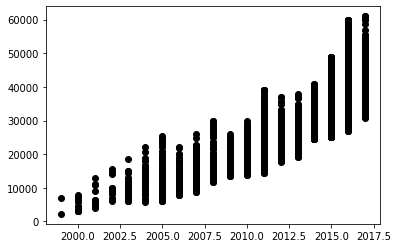

In [ ]:
for i in range(2):
  df_Years = df_p.groupby('Year')['Price']
  high = df_Years.mean() + df_Years.std() * 2.5
  low = df_Years.mean() - df_Years.std() * 1.5

  for year in df_p['Year'].unique():
      df_p = df_p.drop(df_p[(df_p['Price'] > high[year]) & (df_p['Year'] == year)].index)
      df_p = df_p.drop(df_p[(df_p['Price'] < low[year]) & (df_p['Year'] == year)].index)

X = df_p.iloc[:, 1]
Y = df_p.iloc[:, 0]

plt.scatter(X, Y, color='black')
plt.show() 

#### check and remove outliers of mileage feature 

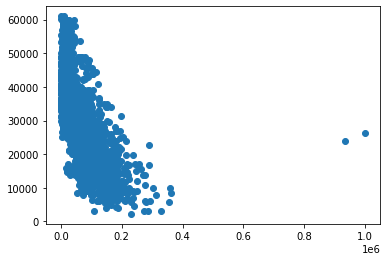

In [ ]:
X = df_p.iloc[:, 2]
Y = df_p.iloc[:, 0]

plt.scatter(X, Y)
plt.show() 

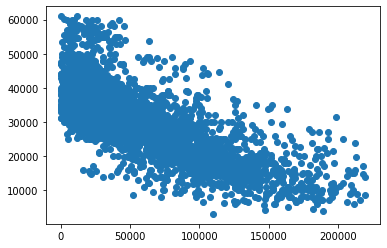

In [ ]:
df_p = df_p[df_p['Mileage'] < 220000]

X = df_p.iloc[:, 2]
Y = df_p.iloc[:, 0]

plt.scatter(X, Y)
plt.show() 

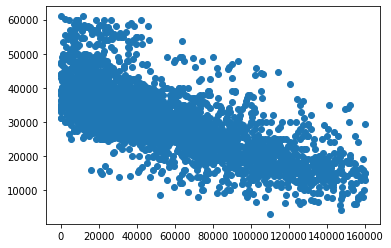

In [ ]:
df_p = df_p[df_p['Mileage'] < 160000]

X = df_p.iloc[:, 2]
Y = df_p.iloc[:, 0]

plt.scatter(X, Y)
plt.show() 

### Normalization 
- mileage and year feature need normalization 

In [ ]:
max_value = df_p['Mileage'].max()
min_value = df_p['Mileage'].min()
df_p['Mileage'] = (df_p['Mileage'] - min_value) / (max_value - min_value)

max_value = df_p['Year'].max()
min_value = df_p['Year'].min()
df_p['Year'] = (df_p['Year'] - min_value) / (max_value - min_value)

df_p.head()

,Price,Year,Mileage
0,40000,1.000000,0.013528
1,46991,0.882353,0.281769
2,38995,1.000000,0.066613
3,31860,0.941176,0.181618
4,14700,0.588235,0.136396


## Build and Train Model

### Hyper parameters 

In [ ]:
lr = 0.1
epoch = 4000
stopping_threshold = 1e-6
degree = 2

### Initial Polynomial Features

In [ ]:
df_p['Raised_power_Mileage'] = np.power((df_p['Mileage']), degree)

df_p['Raised_power_Year'] = np.power((df_p['Year']), degree)

df_p.head() 

,Price,Year,Mileage,Raised_power_Mileage,Raised_power_Year
0,40000,1.000000,0.013528,0.000183,1.000000
1,46991,0.882353,0.281769,0.079394,0.778547
2,38995,1.000000,0.066613,0.004437,1.000000
3,31860,0.941176,0.181618,0.032985,0.885813
4,14700,0.588235,0.136396,0.018604,0.346021


### Split train and test 

In [ ]:
X = np.array(df_p.drop(['Price'], axis=1))
y = np.array(df_p['Price']) 

In [ ]:
Splitting_fact = 0.9

In [ ]:
n_train = math.floor(Splitting_fact * X.shape[0])
n_test = math.ceil((1 - Splitting_fact) * X.shape[0])

X_train = X[:n_train]
y_train = y[:n_train]

X_test = X[n_train:]
y_test = y[n_train:]

print("Total Number of rows in train:", X_train.shape[0])
print("Total Number of rows in test:", X_test.shape[0])


Total Number of rows in train: 3303
Total Number of rows in test: 368


In [ ]:
X_test.shape

(368, 4)

In [ ]:
X_train.shape

(3303, 4)

### Train

In [ ]:
costs_p, w_p, b_p = BGD(X_train, y_train)

epoch 1: cost is 780447252.3863419 now
epoch 2: cost is 627441940.2154121 now
epoch 3: cost is 519883183.8179349 now
epoch 4: cost is 443080114.9815709 now
epoch 5: cost is 387406972.48844403 now
epoch 6: cost is 346472275.81959033 now
epoch 7: cost is 315971105.56247663 now
epoch 8: cost is 292960466.54241675 now
epoch 9: cost is 275397891.1082054 now
epoch 10: cost is 261844747.81591246 now
epoch 11: cost is 251273301.710693 now
epoch 12: cost is 242939657.37713066 now
epoch 13: cost is 236298933.64005592 now
epoch 14: cost is 230947803.9366015 now
epoch 15: cost is 226584986.71247664 now
epoch 16: cost is 222983668.41946638 now
epoch 17: cost is 219971973.26120394 now
epoch 18: cost is 217418940.5976435 now
epoch 19: cost is 215224329.14873633 now
epoch 20: cost is 213311119.52620938 now
epoch 21: cost is 211619946.22383374 now
epoch 22: cost is 210104927.28020552 now
epoch 23: cost is 208730518.30439872 now
epoch 24: cost is 207469125.04184398 now
epoch 25: cost is 206299282.661135

## Predict and plot 

### Plot costs

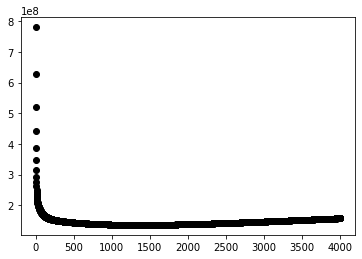

best cost is: 136095096.5671296


In [ ]:
X = range(len(costs_p))
Y = costs_p

plt.scatter(X, Y, color='black')
plt.show() 

print(f'best cost is: {min(costs_p)}')

### Use Polynomial Regression and predict the best line for mileage feature

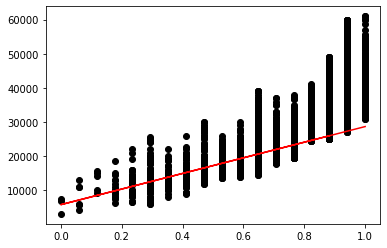

In [ ]:
X = df_p['Year']
Y = df_p['Price']
plt.scatter(X, Y, color='black')

X_line = X
Y_line = df_p['Year'] * w[0] + b

plt.plot(X_line, Y_line, color='red') 

### Predict Test data tagets

In [ ]:
target = np.array(X_test).dot(w_p) + b_p

final_result_p  = pd.DataFrame(X_test) 

final_result_p['Price'] = target 

final_result_p.head() 


,0,1,2,3,Price
0,1.000000,0.027099,0.000734,1.000000,41208.916126
1,0.705882,0.812644,0.660390,0.498270,24067.779411
2,0.823529,0.156300,0.024430,0.678201,32002.160618
3,0.882353,0.179430,0.032195,0.778547,34488.409993
4,0.882353,0.223345,0.049883,0.778547,34216.323239


Year, Mileage, Raised_power_Mileage, Raised_power_Year, Price